Data Cleaning Exercise

Data Scientists and Analysts are often tasked to clean and analyze datasets. We are working with an external research firm who specializes in the application of artificial intelligence to forecasting prices of financial instruments. This firm has developed a proprietary system, called “4sight”, to forecast prices of certain instruments.

To demonstrate the effectiveness of their forecasting system, the vendor has sent us attached sample dataset. The dataset includes signal values generated by the 4sight system as well as historical prices for a well-known broad market ETF.

A Portfolio Manager has asked you to:

1. Review the quality of the data, list any potential errors, and propose corrected values. Please list each quality check error and correction applied.

2. Please analyze the signal’s effectiveness or lack thereof in forecasting ETF price, using whatever metrics you think are most relevant.

3. (Extra credit) Write a 1-2 paragraph summary for the Portfolio Manager addressing your observations about the efficacy and believability of the product, and recommendation for next steps.

In [1]:
# Here, I import relevant python libraries.

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

<h2>Part 1: loading the data, gaining intuition of the data, and cleaning the data</h2>

In [2]:
# Before this step, I saved the original XLSX file of data as a CSV file such that we can use pandas library to read it.
# Here, I load the data.

df = pd.read_csv('sample_dataset.csv')

In [3]:
df

,Date,Signal,Open,High,Low,Close,Adj Close
0,19/11/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,20/11/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,23/11/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,24/11/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,25/11/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
1033,30/12/2019,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
1034,31/12/2019,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
1035,2/1/2020,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946
1036,3/1/2020,0.000000,163.740005,165.410004,163.699997,165.130005,163.317093


In [4]:
# I noticed that in the last six rows, the value of the data in the "Signal" colume are all zero.
# These are errors (missing data). 
# Since I do not know the value of signals on these days, I delete them from the DataFrame.

df = df.loc[df['Signal']>0]

In [5]:
df

,Date,Signal,Open,High,Low,Close,Adj Close
0,19/11/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,20/11/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,23/11/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,24/11/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,25/11/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
1027,19/12/2019,20.223888,165.279999,165.729996,164.880005,165.729996,163.910477
1028,20/12/2019,19.858758,166.149994,166.410004,165.720001,165.970001,164.147858
1029,23/12/2019,20.855705,166.240005,166.360001,165.360001,166.300003,164.474243
1030,24/12/2019,21.361876,166.449997,166.699997,166.039993,166.679993,164.850052


<AxesSubplot:xlabel='Signal', ylabel='Close'>

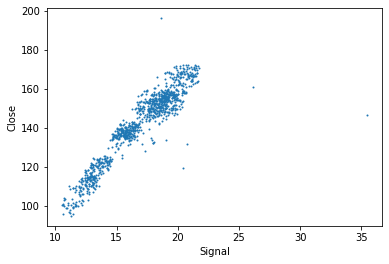

In [6]:
# Now, I make a scatter plot of the signal and the close price.
df.plot.scatter(x='Signal', y='Close', s=1)

It seems that the close price and the signal increases together. However, from this we cannot conclude that the signal has the predictive power for the close price. This is because the value of the stock price increases generally in the long term. If the average value of the signal also increases in the long term, even if the signal has no predictive power for the close price, we can see a correlation between the absolute value of the signal and the stock price.

In order to scrutiny the predictive power of the single more rigorously, we need to calculate daily return rate of the signal and of the close price and to see whether they are correlated.

In [7]:
# Now, I calculate the raturn rate of the signal and the close price and drop the first row.

df['sig_ret'] = (df['Signal'] - df['Signal'].shift()) / df['Signal'].shift()
df['close_ret'] = (df['Close'] - df['Close'].shift()) / df['Close'].shift()
df = df.dropna()

<ipython-input-7-ff3a3e1c2e96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sig_ret'] = (df['Signal'] - df['Signal'].shift()) / df['Signal'].shift()
<ipython-input-7-ff3a3e1c2e96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_ret'] = (df['Close'] - df['Close'].shift()) / df['Close'].shift()


In [8]:
df

,Date,Signal,Open,High,Low,Close,Adj Close,sig_ret,close_ret
1,20/11/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323,-0.011600,0.006462
2,23/11/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453,-0.045429,0.004965
3,24/11/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837,-0.024876,0.007326
4,25/11/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159,0.027825,0.007780
5,27/11/2015,12.879819,119.269997,119.900002,118.879997,119.620003,111.602997,-0.010760,0.003776
...,...,...,...,...,...,...,...,...,...
1027,19/12/2019,20.223888,165.279999,165.729996,164.880005,165.729996,163.910477,0.017220,0.004302
1028,20/12/2019,19.858758,166.149994,166.410004,165.720001,165.970001,164.147858,-0.018054,0.001448
1029,23/12/2019,20.855705,166.240005,166.360001,165.360001,166.300003,164.474243,0.050202,0.001988
1030,24/12/2019,21.361876,166.449997,166.699997,166.039993,166.679993,164.850052,0.024270,0.002285


<AxesSubplot:xlabel='sig_ret', ylabel='close_ret'>

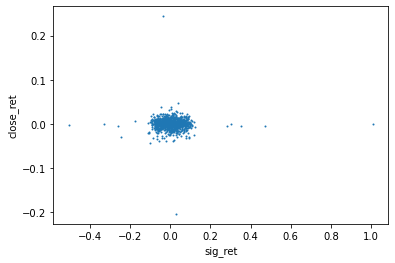

In [9]:
# To see the correlation between the signal return rate and the close price return rate, 
# I make a scatter plot of these two variables.

df.plot.scatter(x='sig_ret', y='close_ret', s=1)

As we can see from the plot, intuitively, it seems that the signal has no predictive power for the price return rate.

<h2> Part 2: analyzing the data and evaluating its efficacy </h2>

I examine the predictive power of the signal by conducting two step examinations. First, I calculate the Pearson correlation coefficient of the signal return rate and the stock return rate. Second, I do a linear regression and calculate the t-statistic of the slope.

In [10]:
# Here, I calculate the Pearson correlation coefficient.

Pearson_coef, p_value = pearsonr(df['sig_ret'], df['close_ret'])
print("Pearson correlation coefficient: " + str(Pearson_coef))
print("p-value: " + str(p_value))

Pearson correlation coefficient: -0.013035578045446293
p-value: 0.6758945900458968


In [11]:
# Here, I do a linear regression and calculate the t-statistic.

res = sm.OLS(df['close_ret'], sm.add_constant(df['sig_ret'], prepend=False)).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              close_ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1749
Date:                Sat, 19 Jun 2021   Prob (F-statistic):              0.676
Time:                        14:43:34   Log-Likelihood:                 2916.2
No. Observations:                1031   AIC:                            -5828.
Df Residuals:                    1029   BIC:                            -5819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sig_ret       -0.0029      0.007     -0.418      0.6

As we can see, the Pearson correlation coefficient of the signal raturn rate and the stock return rate is -0.013 and the corresponding p-value is 0.676, which is very large. By doing a linear regression, we can see that the slope is -0.0029 and the abosolute value of the t-statistic of the slope is 0.418, which is very small. Moreover, the R-squared is zero. Thus, we can conclude that the signal has no predictive power for the stock raturn rate.

<h2>Part 3: writing a summary</h2>

I analyzed the sample dataset of "4sight" sent my the research firm which we collaborate with. In the last six rows of the sample dataset, the values of the signal are missing. There are 1032 remaining valid data points. Although it seems that there is a positive correlation between the signal and the close price, we cannot conclude that the signal has the predictive power for the price. This is because that the price increases in the long term in general and if the average value of the singal also increases, even if the signal has no predictive power for the price, we can see such a positive correlation between the abosolute value of the signal and the abosolute value of the price.

In order to scrutinize the predictive power of the signal rigorously, I calculated the daily returns of the signal and the close price and made a scatter plot. From the plot, we can see that there is no correlation between the daily signal return and the daily stock return. The Pearson correlation coefficient between the signal return and the stock return is -0.013 and the corresponding p-value is quite large. After conducting a linear regression, I find a R-squared of zero. The regression coefficient of the signal is -0.0029 and the corresponding t-statistic is -0.418, whose absolute value is quite small. Thus, we can conclude that this signal has no predictive power for the stock price return rate.

I recommend that we do not purchase the data of this signal.